# **SyriaTel Customer Churn Prediction**

**Author** - [Maureen Kitang'a](https://github.com/ndungek)

----

## 1. Business UnderStanding

### Problem Statement

SyriaTel, a telecommunications company, is facing a high churn rate, with many customers discontinuing their services and switching to competitors. The company wants to address this issue by developing a customer churn prediction model. By analyzing the dataset, SyriaTel aims to gain insights into customer behavior and characteristics associated with churn, with the goal of reducing churn rate, increasing customer retention, and improving overall profitability.

### Specific Objectives

* Identify the factors that are most likely to lead to customer churn.
* Develop a model that can accurately predict which customers are at risk of churning.
* Take proactive steps to retain customers who are at risk of churning.


### Success Metrics

With an ROC_AUC score of 0.75, SyriaTel can effectively identify customers who are likely to churn. This will enable the company to implement targeted retention strategies.

The solutions based on the churn prediction model's insights and the targeted retention strategies can include:

* Implementing personalized offers and incentives.
* Enhancing customer service and support.
* Developing customer loyalty programs.
* Optimizing marketing campaigns.
* Continuous monitoring and proactive measures.

## 2.  Data Understanding

In [1]:
# Import modules & packages

# Data manipulation 
import pandas as pd 
import numpy as np 

# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.graph_objs as go

# Modeling
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV 
from imblearn.over_sampling import SMOTE 
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report # performance metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.feature_selection import RFECV

# Algorithms for supervised learning methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading the data
data = pd.read_csv("telecom.csv")

#Previewing the first few rows
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
#Size of the dataframe
print("The number of rows: {}".format(data.shape[0]), "The number of columns:{}".format(data.shape[1]))

The number of rows: 3333 The number of columns:21


In [4]:
# General statistics of numeric columns
data.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [5]:
#General overview of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
# Numerical Columns
print(f"Numerical Columns: {data.select_dtypes(include='number').columns}\n")

# Categorical Columns
print(f"Categorical Columns: {data.select_dtypes(include='object').columns}")

Numerical Columns: Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')

Categorical Columns: Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')


Categorical Features:

`state`: The state where the customer resides.

`phone number`: The phone number of the customer.

`international plan`: Whether the customer has an international plan (Yes or No).

`voice mail plan`: Whether the customer has a voice mail plan (Yes or No).

Numeric Features:

`area code`: The area code associated with the customer's phone number.

`account length`: The number of days the customer has been an account holder.

`number vmail messages`: The number of voice mail messages received by the customer.

`total day minutes`: The total number of minutes the customer used during the day.

`total day calls`: The total number of calls made by the customer during the day.

`total day charge`: The total charges incurred by the customer for daytime usage.

`total eve minutes`: The total number of minutes the customer used during the evening.

`total eve calls`: The total number of calls made by the customer during the evening.

`total eve charge`: The total charges incurred by the customer for evening usage.

`total night minutes`: The total number of minutes the customer used during the night.

`total night calls`: The total number of calls made by the customer during the night.

`total night charge`: The total charges incurred by the customer for nighttime usage.

`total intl minutes`: The total number of international minutes used by the customer.

`total intl calls`: The total number of international calls made by the customer.

`total intl charge`: The total charges incurred by the customer for international usage.

`customer service calls`: The number of customer service calls made by the customer.

## 3. Data Preparation
For this phase, we will perform data cleaning, conduct exploratory data analysis (EDA), and feature engineering.

### 3.1 Data Cleaning

> In this section, we will be looking at the missing values in the dataset as well as the duplicate records in the dataset.

In [7]:
def check_missing_values(df):
    """
    A function to check for missing values in a DataFrame
    """
    missing_values = df.isnull().sum().sort_values(ascending=False)
    if missing_values.sum() == 0:
        return "No missing values found."
    else:
        missing_percent = round(missing_values/len(df)*100,2)
        missing_values = pd.concat([missing_values, missing_percent], axis=1, keys=['Number of Missing Values', 'Percentage of Missing Values'])
        return missing_values

In [8]:
check_missing_values(data)

'No missing values found.'

In [9]:
def check_duplicates(df):
    """
    Function to check for duplicates in a DataFrame
    """
    duplicates = df.duplicated()
    if duplicates.any():
        print("Duplicates found:{}", duplicates)
    else:
        print("No duplicates")

In [10]:
check_duplicates(data)

No duplicates


In [11]:
#converting 'area code' datatype
data["area code"] = data["area code"].astype(object)

### 3.2 Exploratory Data Analysis

 This phase involves exploring and understanding the dataset to uncover patterns, identify relationships between variables, detect outliers, and gain insights into the data before applying any modeling or statistical techniques.

#### 3.2.1 Univariate Analysis

> In this section, we'll explore each column in the dataset to see the distributions, central tendency, and spread of the feature, as well as identify any outliers or patterns present within it.

##### 3.2.1.1 Distribution of  "Churn"  Feature

In [12]:
#plotting the target variable distribution

class_counts = data.groupby("churn").size()

# Create a bar chart of the value counts using Plotly
fig = go.Figure(
    data=[go.Bar(x=class_counts.index, y=class_counts.values)],
    layout=go.Layout(title="Churn Distribution", xaxis=dict(tickvals=[0, 1], ticktext=["Not Churn", "Churn"]), 
          hovermode = 'closest',width=600)
)

# Show the chart
fig.show()

Of the 3,333 customers in the dataset, 483 have terminated their contract. That is 14.5% of customers lost.
The distribution of the binary classes shows a data imbalance. This needs to be addressed before modeling as an unbalanced feature can cause the model to make false predictions.

##### 3.2.1.2 Distribution of the "area code" feature

In [13]:
# Pie chart of area code feature
import plotly.express as px
area = data['area code'].value_counts()
transanction = area.index
quantity = area.values

# plot pie circle with plotly
figure = px.pie(data,
               values = quantity,
               names = transanction,
               hole = .5,
               title = 'Distribution of Area Code Feature')
figure.show()

* Almost half of the customers are in `area code 415`.
* One fourth of customers are in `area code 510` and another fourth are in `area code 408`.

##### 3.2.1.3 Distribution of the numerical features

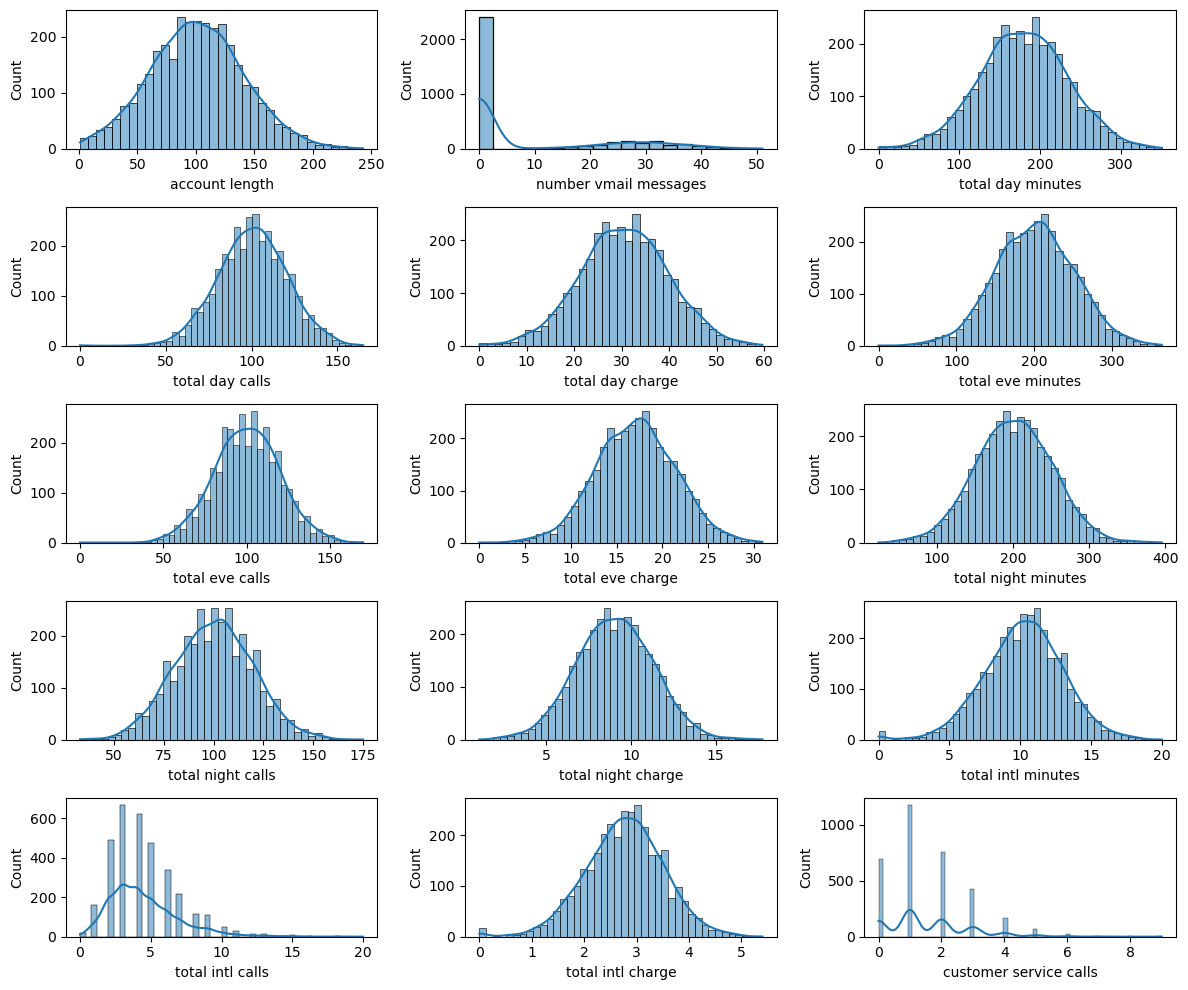

In [14]:
#checking for distribution of the numeric features
numeric_features = ['account length', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge',
'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls',
'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']

# Calculate the number of rows and columns for subplots
nrows = (len(numeric_features) - 1) // 3 + 1
ncols = min(3, len(numeric_features))

# Create subplots
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 10))

# Flatten axes if necessary
axes = axes.flatten() if nrows > 1 else [axes]

# Plot numeric features
for i, feature in enumerate(numeric_features):
    ax = axes[i]
    sns.histplot(data[feature], kde=True, ax=ax)
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")

# Remove empty subplots
if len(numeric_features) < nrows * ncols:
    for i in range(len(numeric_features), nrows * ncols):
        fig.delaxes(axes[i])

# Adjust subplot spacing
fig.tight_layout()

# Display the plot
plt.show()

For the distribution plots of the features above, all of them except customer service calls and number of voicemail messages have a normal distribution. Total international calls seems to be skewed to the right side however it is still normally distributed.
Customer service calls has a few peaks, which indicates there are a few modes in the population.

##### 3.2.1.4 Distribution of the categorical features

There are 3 categorical Columns in the dataset that we shall be analysing: `state`,`international plan` and `voice mail plan`.

In [15]:
#Checking the distribution of categorical features
def plot_categorical_distribution(data, feature):
    """
    Plots the distribution of a categorical feature in the given data.
    """
    plt.figure(figsize=(10, 4))
    sns.countplot(x=feature, hue="churn", data=data, order=data[feature].value_counts().iloc[0:15].index)
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.show()

* State

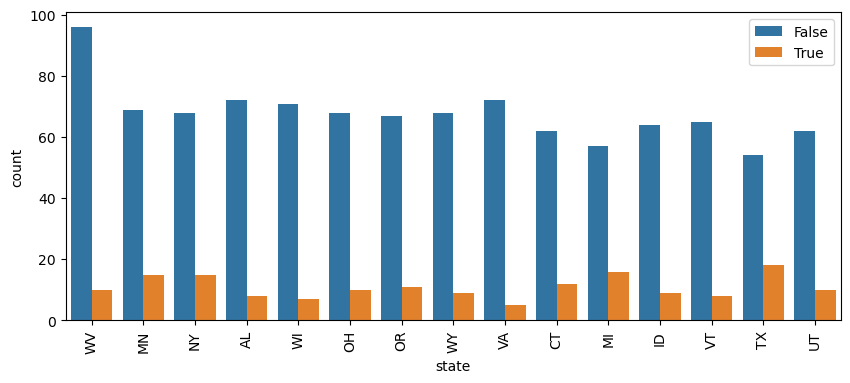

In [16]:
plot_categorical_distribution(data, 'state')

Of all the customers who terminated their contracts, most of them are from `Texas`, `Miami`, `NewYork`, and `Minnesota`.

* International plan

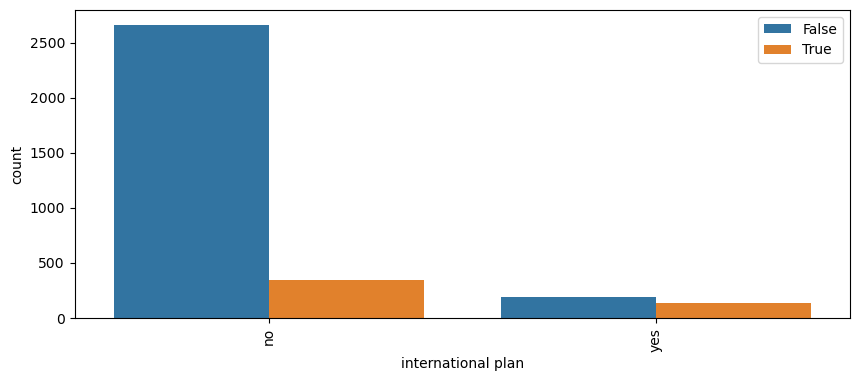

In [17]:
plot_categorical_distribution(data,'international plan')

Customers that do not have an international plan churned the most.

* Voicemail plan

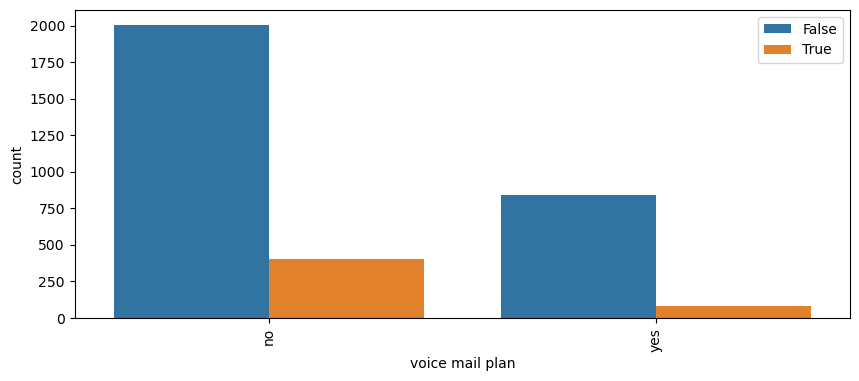

In [18]:
plot_categorical_distribution(data, 'voice mail plan')

Of all customers that churned, most did not have a voicemail plan.

#### 3.2.2 Dealing with Outliers

Outliers can disproportionately impact the performance of predictive models by introducing noise or skewing the training process. By excluding outliers beyond 3 standard deviations, we improve our models' ability to generalize patterns and make more accurate predictions on unseen data.

In [19]:
def drop_numerical_outliers(df, z_thresh=3):
    constrains = df.select_dtypes(include=[np.number]).apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    df.drop(df.index[~constrains], inplace=True)
    
drop_numerical_outliers(data)
print(data.shape)

(3169, 21)


#### 3.2.3 Bivariate Analysis
> In this section,we explore the relationship or association between two variables in the dataset. It allows us to examine how changes in one variable are related to changes in another variable.

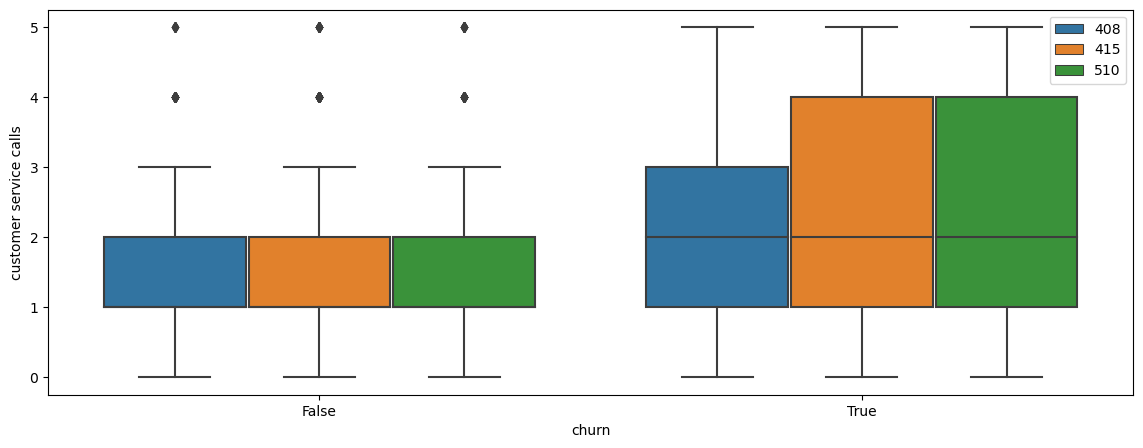

In [20]:
# Boxplot to see which area code has the highest churn
plt.figure(figsize=(14,5))
sns.boxplot(data=data,x='churn',y='customer service calls',hue='area code');
plt.legend(loc='upper right');


Of the customers who have terminated their account, most of them are from area codes `415` and `510`. And it is clear that there are quite a number of outliers.

In [21]:
def plot_churn_kde(data, x_column, charge_type):
    plt.figure(figsize=(8, 4))
    sns.kdeplot(data=data, x=x_column, hue='churn', fill=True)
    plt.xlabel(f'Total {charge_type} Charge')
    plt.ylabel('Density')
    plt.title(f'Churn Distribution by {charge_type} Charges')
    plt.show()

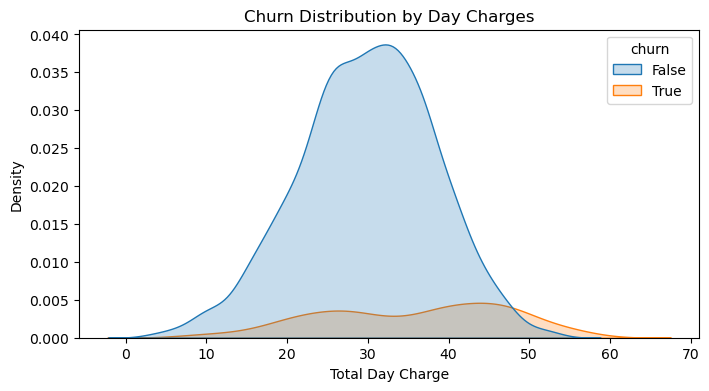

In [22]:
# Churn by day charges
plot_churn_kde(data, 'total day charge', 'Day')


The KDE plot for churn by day charges shows that customers who have terminated their accounts tend to have higher total day charges than customers who have not terminated their accounts. This suggests that customers who are unhappy with their service or who are finding it too expensive during the day may be more likely to churn.

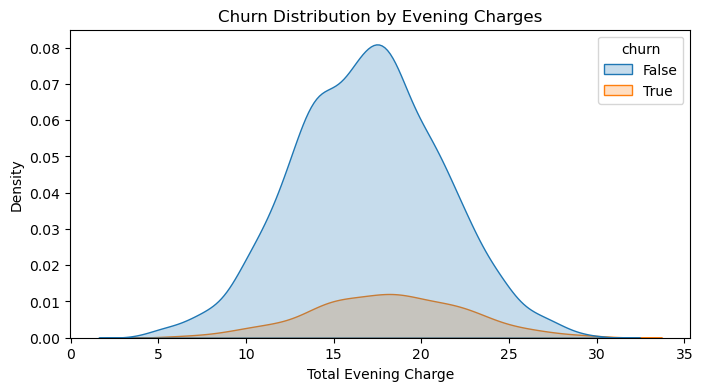

In [23]:
# Churn by evening charges
plot_churn_kde(data, 'total eve charge', 'Evening')

The KDE plot for churn by evening charges shows a similar pattern to the churn by day charges plot. Customers who have terminated their accounts tend to have higher total evening charges than customers who have not terminated their accounts. This suggests that customers who are unhappy with their service or who are finding it too expensive during the evening may be more likely to churn.

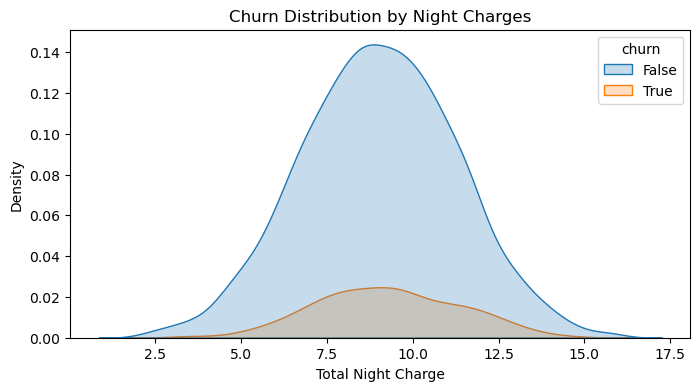

In [24]:
# Churn by night charges
plot_churn_kde(data, 'total night charge', 'Night')

The KDE plot for churn by night charges shows a similar pattern to the churn by day charges and churn by evening charges plots. Customers who have terminated their accounts tend to have higher total night charges than customers who have not terminated their accounts. This suggests that customers who are unhappy with their service or who are finding it too expensive during the night may be more likely to churn.

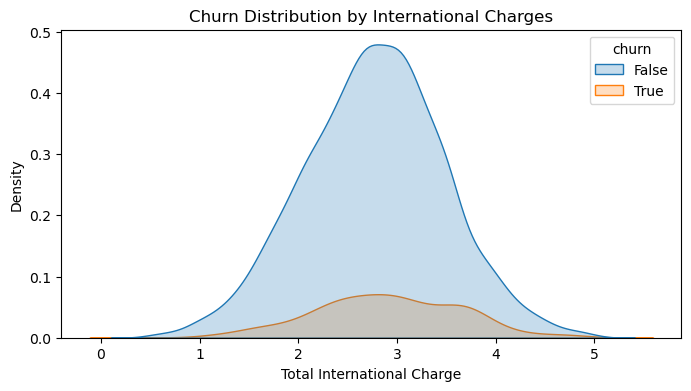

In [25]:
plot_churn_kde(data, 'total intl charge', 'International')

 The plot suggests that customers with higher total international charges have a slightly higher likelihood of churning.

#### 3.2.4 Features Correlation

In [26]:
# Finding correlation between features using a heatmap
def corrmatrix(df):
    ''' This function plots a correlation matrix for a given dataframe '''
    plt.figure(figsize=(10, 5))

    corr = df.corr()

    # Generate a mask to only show the bottom triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))

    # generate heatmap
    sns.heatmap(round(corr,2), annot=True, mask=mask, vmin=-1, vmax=1, cmap='Blues')
    plt.title('Correlation of Features')
    plt.show()

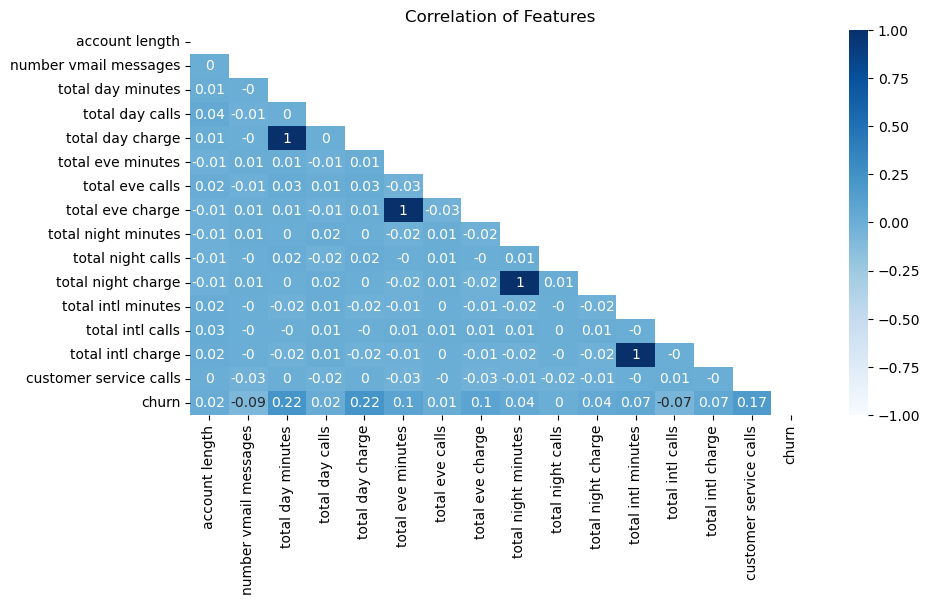

In [27]:
corrmatrix(data)

### 3.3 Feature Engineering

##### 3.3.1 Label Encoding
A technique used to convert categorical variables into numerical values

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
# Convert columns with yes or no to binary
label_encoder = LabelEncoder()
data['churn'] = label_encoder.fit_transform(data['churn'])
data['international plan'] = label_encoder.fit_transform(data['international plan'])
data['voice mail plan'] = label_encoder.fit_transform(data['voice mail plan'])

#### 3.3.2 One Hot Encoding

In [30]:
data = pd.get_dummies(data,columns = ['state', 'area code'])
data.head()

,account length,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area code_408,area code_415,area code_510
0,128,382-4657,0,1,25,265.1,110,45.07,197.4,99,...,0,0,0,0,0,0,0,0,1,0
1,107,371-7191,0,1,26,161.6,123,27.47,195.5,103,...,0,0,0,0,0,0,0,0,1,0
2,137,358-1921,0,0,0,243.4,114,41.38,121.2,110,...,0,0,0,0,0,0,0,0,1,0
3,84,375-9999,1,0,0,299.4,71,50.90,61.9,88,...,0,0,0,0,0,0,0,1,0,0
4,75,330-6626,1,0,0,166.7,113,28.34,148.3,122,...,0,0,0,0,0,0,0,0,1,0


#### Dealing with Multicollinearity

In [31]:
data=data.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
data['pairs'] = list(zip(data.level_0, data.level_1))

# set index to pairs
data.set_index(['pairs'], inplace = True)

#d rop level columns
data.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
data.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
data.drop_duplicates(inplace=True)

In [32]:
data[(data.cc>.85) & (data.cc <1)]

,cc
pairs,
"(total day minutes, total day charge)",1.000000
"(total eve minutes, total eve charge)",1.000000
"(total night charge, total night minutes)",0.999999
"(total intl charge, total intl minutes)",0.999992
"(voice mail plan, number vmail messages)",0.957304


We are going to retain all the columns because each pair has two related columns and both have the same importance.

## Modeling

> In this phase, we will build a model that can predict the customer churn based on the features in our dataset. The model will be evaluated on the ROC_AUC score. Specifically, if it achieves an ROC_AUC score of 75% or higher, it will be considered a success.

In order to achieve the targets stipulated in the project proposal, we will be using the following algorithms:
- Logistic Regression
- Decision Tree
- Random Forest
- K-Nearest Neighbors
- XG Boost

We will also be using the following metrics to evaluate the performance of our models:
-  Precision, Recall and F1 score

To deal with class imbalance, we will be using the following `SMOTE` technique.
